In [1]:
%cd /Users/ericwindsor/Documents/EPITA_ERIC/AI_Project_Methodology/AIPM_Final
%load_ext autoreload
%autoreload 2
import pandas as pd


/Users/ericwindsor/Documents/EPITA_ERIC/AI_Project_Methodology/AIPM_Final


In [2]:
data = pd.read_excel('data/E_Commerce_Dataset.xlsx',sheet_name='E Comm')


In [3]:
from scripts.train import train
res = train(data,'test')

2024/04/04 16:48:21 INFO mlflow.tracking.fluent: Experiment with name 'Churn Prediction' does not exist. Creating a new experiment.
2024/04/04 16:48:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/04/04 16:48:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/ericwindsor/miniconda3/envs/ml/lib/python3.9/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/04/04 16:48:22 WARNING mlflow.data.pandas_dataset: Failed to infer schema for Pandas dataset. Exception: Expected pandas.Series, got '<class 'pandas.core.frame.DataFrame'>'.
2024/04/04 16:48:24 WARNING mlflow.sklearn: Failed to infer model signature: Expected pandas.Series, got '<class 'pandas.core.frame.DataFrame'>'.
2024/04/04 16:48:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/ericwindsor/miniconda3/envs/ml/lib/python3.9/site-pack

In [4]:
res

{'testing_accuracy': 0.9733570159857904,
 'testing_f1': 0.9127906976744187,
 'mse': 0.02664298401420959}

In [5]:
import shap
import joblib
from scripts.preprocess import preprocess
model = joblib.load('models/Model.joblib')
data = preprocess(data)

In [10]:
explainer = shap.TreeExplainer(model)
choosen_instance = data.iloc[[0]]
shap_values = explainer.shap_values(choosen_instance)
expected_value = explainer.expected_value[1]  
shap_values_class = shap_values[0][:, 1] 
shap.initjs()
shap.force_plot(expected_value, shap_values_class, choosen_instance)


In [7]:
data = data[:500]

In [11]:
shap_values = explainer.shap_values(data)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], data)

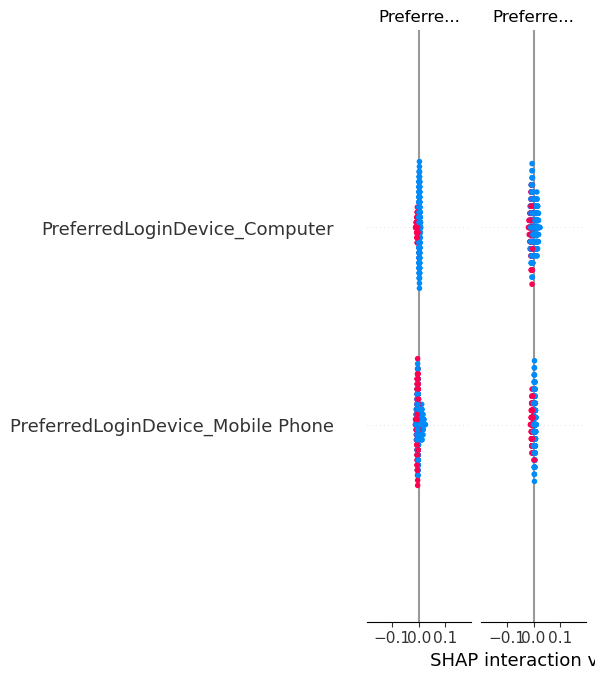

In [9]:
shap.summary_plot(shap_values, data)